## Exploratory Data Analysis for Pokémon!

On the online platform "Pokémon Showdown," players can play in random pokemon battles against each other where they are given each given random teams of six different pokemon. What I aim to achieve through this exploratory data analysis is a grasp of what kinds of Pokémon would thrive most in this format. In other words, what Pokémon should players be excited to see pop up on their team?

In [480]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
df = pd.read_csv('./pokedex.csv')
df

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,1040,896,Glastrier,Polaross,ブリザポス (Burizaposu),8,Sub Legendary,Wild Horse Pokémon,1,Ice,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1041,1041,897,Spectrier,Phantoross,レイスポス (Reisuposu),8,Sub Legendary,Swift Horse Pokémon,1,Ghost,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1042,1042,898,Calyrex,Coronospa,バドレックス (Budrex),8,Legendary,King Pokémon,2,Psychic,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1043,1043,898,Calyrex Ice Rider,Coronospa,バドレックス (Budrex),8,Legendary,High King Pokémon,2,Psychic,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


In [481]:
#Clearly, this is quite a lot of data. Let's take a look at the columns and their data types to get a better idea of what we're working with.
df.dtypes

Unnamed: 0            int64
pokedex_number        int64
name                 object
german_name          object
japanese_name        object
generation            int64
status               object
species              object
type_number           int64
type_1               object
type_2               object
height_m            float64
weight_kg           float64
abilities_number      int64
ability_1            object
ability_2            object
ability_hidden       object
total_points          int64
hp                    int64
attack                int64
defense               int64
sp_attack             int64
sp_defense            int64
speed                 int64
catch_rate          float64
base_friendship     float64
base_experience     float64
growth_rate          object
egg_type_number       int64
egg_type_1           object
egg_type_2           object
percentage_male     float64
egg_cycles          float64
against_normal      float64
against_fire        float64
against_water       

In [482]:
#Many of these columns actually have no true use for us when we are only considering battling. We can drop them to make our data a little more manageable.
df.drop(['german_name', 'japanese_name', 'generation', 'species', 'type_number', 'height_m', 'weight_kg', 'abilities_number'], axis=1, inplace = True)
df.drop(['catch_rate', 'base_friendship', 'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1', 'egg_type_2', 'percentage_male', 'egg_cycles'], axis = 1, inplace = True)
df

,Unnamed: 0,pokedex_number,name,status,type_1,type_2,ability_1,ability_2,ability_hidden,total_points,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Normal,Grass,Poison,Overgrow,NaN,Chlorophyll,318,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Normal,Grass,Poison,Overgrow,NaN,Chlorophyll,405,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Normal,Grass,Poison,Overgrow,NaN,Chlorophyll,525,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Normal,Grass,Poison,Thick Fat,NaN,NaN,625,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Normal,Fire,NaN,Blaze,NaN,Solar Power,309,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,1040,896,Glastrier,Sub Legendary,Ice,NaN,Chilling Neigh,NaN,NaN,580,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1041,1041,897,Spectrier,Sub Legendary,Ghost,NaN,Grim Neigh,NaN,NaN,580,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1042,1042,898,Calyrex,Legendary,Psychic,Grass,Unnerve,NaN,NaN,500,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1043,1043,898,Calyrex Ice Rider,Legendary,Psychic,Ice,As One,NaN,NaN,680,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


In [483]:
#Now that we have a much smaller dataset, let's check if we need to do any cleaning.
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.isnull().sum()

pokedex_number        0
name                  0
status                0
type_1                0
type_2              492
ability_1             3
ability_2           529
ability_hidden      232
total_points          0
hp                    0
attack                0
defense               0
sp_attack             0
sp_defense            0
speed                 0
against_normal        0
against_fire          0
against_water         0
against_electric      0
against_grass         0
against_ice           0
against_fight         0
against_poison        0
against_ground        0
against_flying        0
against_psychic       0
against_bug           0
against_rock          0
against_ghost         0
against_dragon        0
against_dark          0
against_steel         0
against_fairy         0
dtype: int64

In [484]:
#We can see that there are a few columns with missing values. For most of these it seems to be ok.
#For example, many pokemon do not have a secondary type, so it makes sense that there are null values in the type_2 column.
#However, all pokemon must have at least 1 ability, so lets look at those rows.
df[df['ability_1'].isnull()]

,pokedex_number,name,status,type_1,type_2,ability_1,ability_2,ability_hidden,total_points,hp,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
33,25,Partner Pikachu,Normal,Electric,NaN,NaN,NaN,Lightning Rod,430,45,...,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
172,133,Partner Eevee,Normal,Normal,NaN,NaN,NaN,Anticipation,435,65,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
1033,890,Eternatus Eternamax,Legendary,Poison,Dragon,NaN,NaN,NaN,1125,255,...,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0


In [485]:
#Turns out that these are very limited pokemon that are not available in the Pokémon Showdown. We can drop these rows.
df.drop([33,172,1033], axis = 0, inplace = True)
df[df['ability_1'].isnull()]

,pokedex_number,name,status,type_1,type_2,ability_1,ability_2,ability_hidden,total_points,hp,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy


In [486]:
#Let's also remove Legendary, Sub Legendary, and Mythical pokemon from our dataset. These are pokemon that will always be powerful
#Our goal is not to just find the strongest pokemon, but to find pokemon that are strong in the random battles that we will be playing.
#So called 'sleeper picks', unconventionally good pokemon, are the pokemon that we are looking for.
df = df[df['status'] == 'Normal']
df

,pokedex_number,name,status,type_1,type_2,ability_1,ability_2,ability_hidden,total_points,hp,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,Normal,Grass,Poison,Overgrow,NaN,Chlorophyll,318,45,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,Normal,Grass,Poison,Overgrow,NaN,Chlorophyll,405,60,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,Normal,Grass,Poison,Overgrow,NaN,Chlorophyll,525,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,Normal,Grass,Poison,Thick Fat,NaN,NaN,625,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,Normal,Fire,NaN,Blaze,NaN,Solar Power,309,39,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,883,Arctovish,Normal,Water,Ice,Water Absorb,Ice Body,Slush Rush,505,90,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
1024,884,Duraludon,Normal,Steel,Dragon,Light Metal,Heavy Metal,Stalwart,535,70,...,2.0,0.5,0.5,0.5,0.5,1.0,1.0,1.0,0.5,1.0
1025,885,Dreepy,Normal,Dragon,Ghost,Clear Body,Infiltrator,Cursed Body,270,28,...,1.0,1.0,1.0,0.5,1.0,2.0,2.0,2.0,1.0,2.0
1026,886,Drakloak,Normal,Dragon,Ghost,Clear Body,Infiltrator,Cursed Body,410,68,...,1.0,1.0,1.0,0.5,1.0,2.0,2.0,2.0,1.0,2.0


In [487]:
#Now that we have a clean dataset, let's take a look at the distributions of our data.
df.describe()

,pokedex_number,total_points,hp,attack,defense,sp_attack,sp_defense,speed,against_normal,against_fire,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,...,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,419.055677,415.225983,66.617904,76.182314,71.396288,67.768559,68.525109,64.735808,0.871725,1.136736,...,1.084607,1.179858,0.988537,0.991539,1.253821,0.983079,0.966703,1.049672,0.978985,1.070415
std,258.725692,104.627260,23.916071,30.196054,29.653281,28.905592,25.346396,28.053853,0.284965,0.723105,...,0.776582,0.588070,0.498363,0.584637,0.701471,0.537132,0.347881,0.417008,0.490798,0.517015
min,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000,0.000000,...,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000
25%,194.750000,320.000000,50.000000,55.000000,50.000000,45.000000,50.000000,44.000000,1.000000,0.500000,...,0.500000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000
50%,410.500000,430.000000,65.000000,73.000000,66.000000,63.000000,65.000000,61.500000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,634.250000,495.000000,78.000000,95.000000,86.000000,85.000000,85.000000,85.000000,1.000000,2.000000,...,1.500000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,887.000000,700.000000,255.000000,185.000000,230.000000,175.000000,230.000000,160.000000,1.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,4.000000,4.000000


/Users/rishikosna/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rishikosna/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rishikosna/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

<AxesSubplot:xlabel='speed', ylabel='Density'>

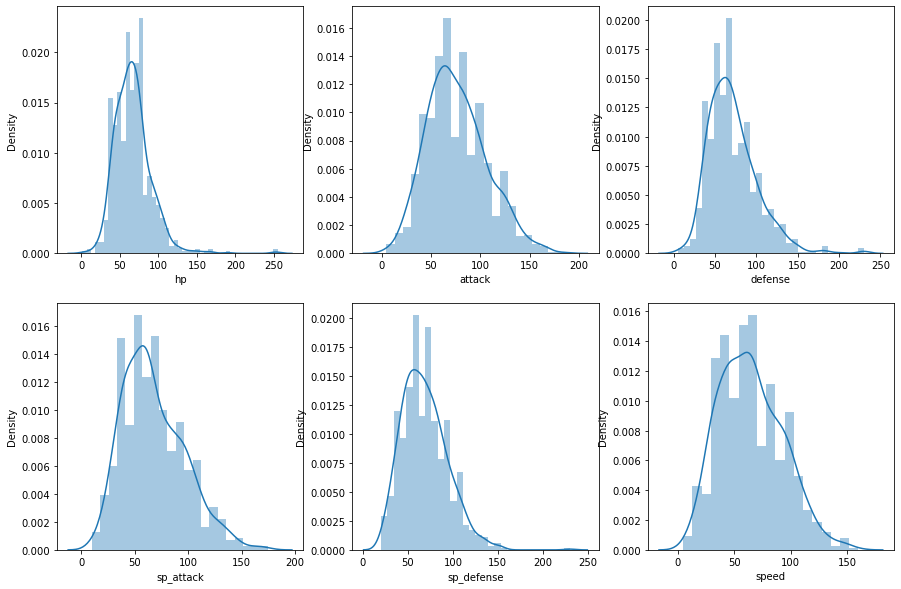

In [488]:
#We can see that there are some outliers in the stats. Let's take a look at the distributions of each base stat.
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.distplot(df['hp'], ax=axes[0,0])
sns.distplot(df['attack'], ax=axes[0,1])
sns.distplot(df['defense'], ax=axes[0,2])
sns.distplot(df['sp_attack'], ax=axes[1,0])
sns.distplot(df['sp_defense'], ax=axes[1,1])
sns.distplot(df['speed'], ax=axes[1,2])

/Users/rishikosna/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rishikosna/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 600.0)

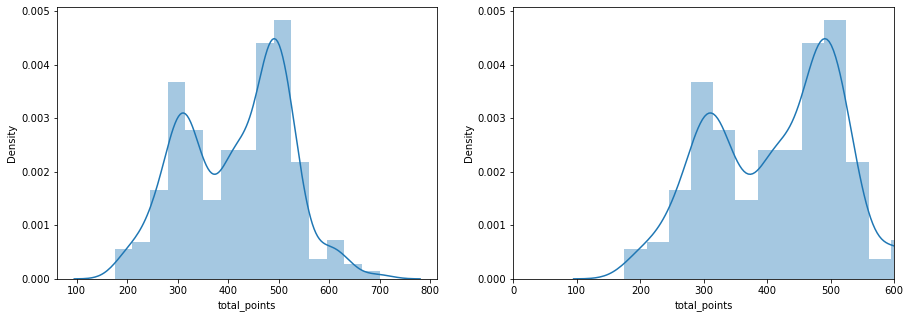

In [489]:
#We can see that the distributions are all skewed to the right. This is not surprising, as most many pokemon are not fully evolved and therefore have lower stats.
#Let's take a look at the distributions of the total stats.
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(df['total_points'], ax=axes[0])
sns.distplot(df['total_points'], ax=axes[1])
axes[1].set_xlim(0, 600)

/Users/rishikosna/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rishikosna/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rishikosna/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

<AxesSubplot:xlabel='against_fairy', ylabel='Density'>

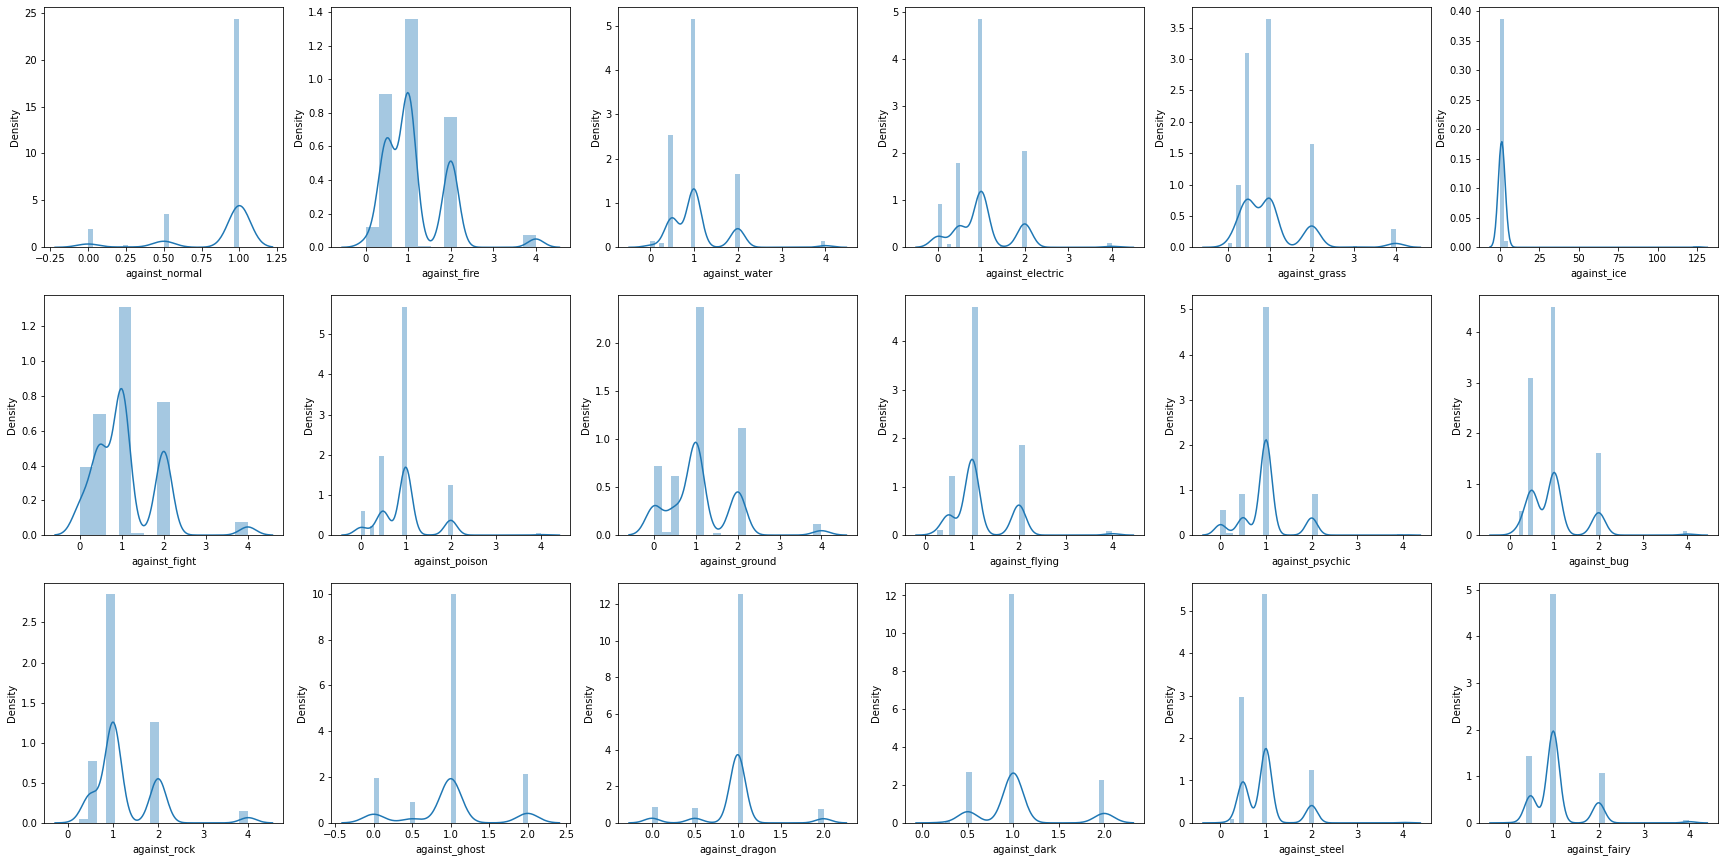

In [490]:
#Above we see a bimodal distribution. This can, once again, be explained by the fact that many pokemon are not fully evolved.
#The first peak is for pokemon that are not fully evolved, and the second peak is for pokemon that are fully evolved, or higher power pokemon in general.
#Let's take a look at the distributions of the type effectiveness.
fig, axes = plt.subplots(3, 6, figsize=(30, 15))
sns.distplot(df['against_normal'], ax=axes[0,0])
sns.distplot(df['against_fire'], ax=axes[0,1])
sns.distplot(df['against_water'], ax=axes[0,2])
sns.distplot(df['against_electric'], ax=axes[0,3])
sns.distplot(df['against_grass'], ax=axes[0,4])
sns.distplot(df['against_ice'], ax=axes[0,5])
sns.distplot(df['against_fight'], ax=axes[1,0])
sns.distplot(df['against_poison'], ax=axes[1,1])
sns.distplot(df['against_ground'], ax=axes[1,2])
sns.distplot(df['against_flying'], ax=axes[1,3])
sns.distplot(df['against_psychic'], ax=axes[1,4])
sns.distplot(df['against_bug'], ax=axes[1,5])
sns.distplot(df['against_rock'], ax=axes[2,0])
sns.distplot(df['against_ghost'], ax=axes[2,1])
sns.distplot(df['against_dragon'], ax=axes[2,2])
sns.distplot(df['against_dark'], ax=axes[2,3])
sns.distplot(df['against_steel'], ax=axes[2,4])
sns.distplot(df['against_fairy'], ax=axes[2,5])

/Users/rishikosna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rishikosna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type_2', ylabel='count'>

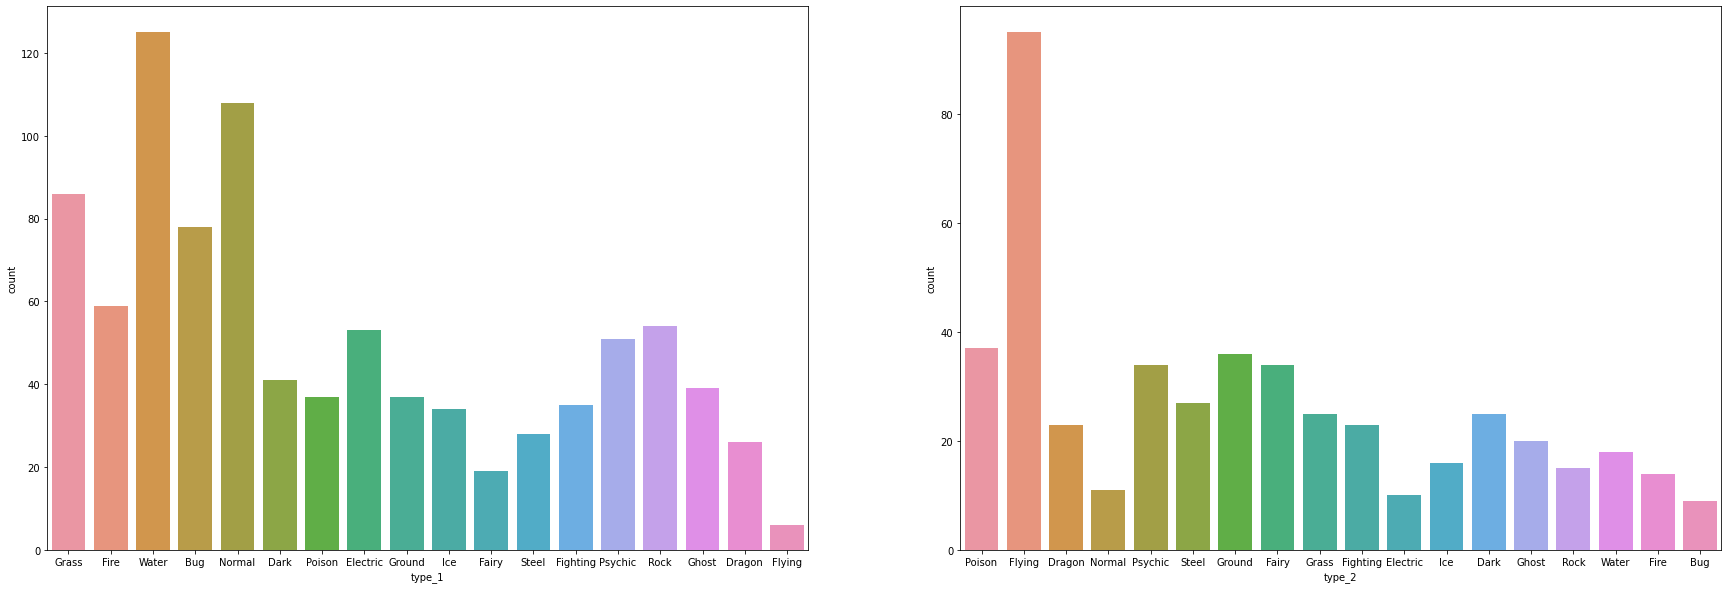

In [491]:
#With these distributions we can see which types tend to best suited to facing a random opponent.
#Lower scores and a skew further to the left indicate what types are best suited to facing a random opponent.
#For example, the distribution of the against_steel column is skewed to the left, which is understandable since steel resists the most types in the game.
#Let's look to which types are the most common.
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
sns.countplot(df['type_1'], ax=axes[0])
sns.countplot(df['type_2'], ax=axes[1])

<AxesSubplot:xlabel='type_2', ylabel='total_points'>

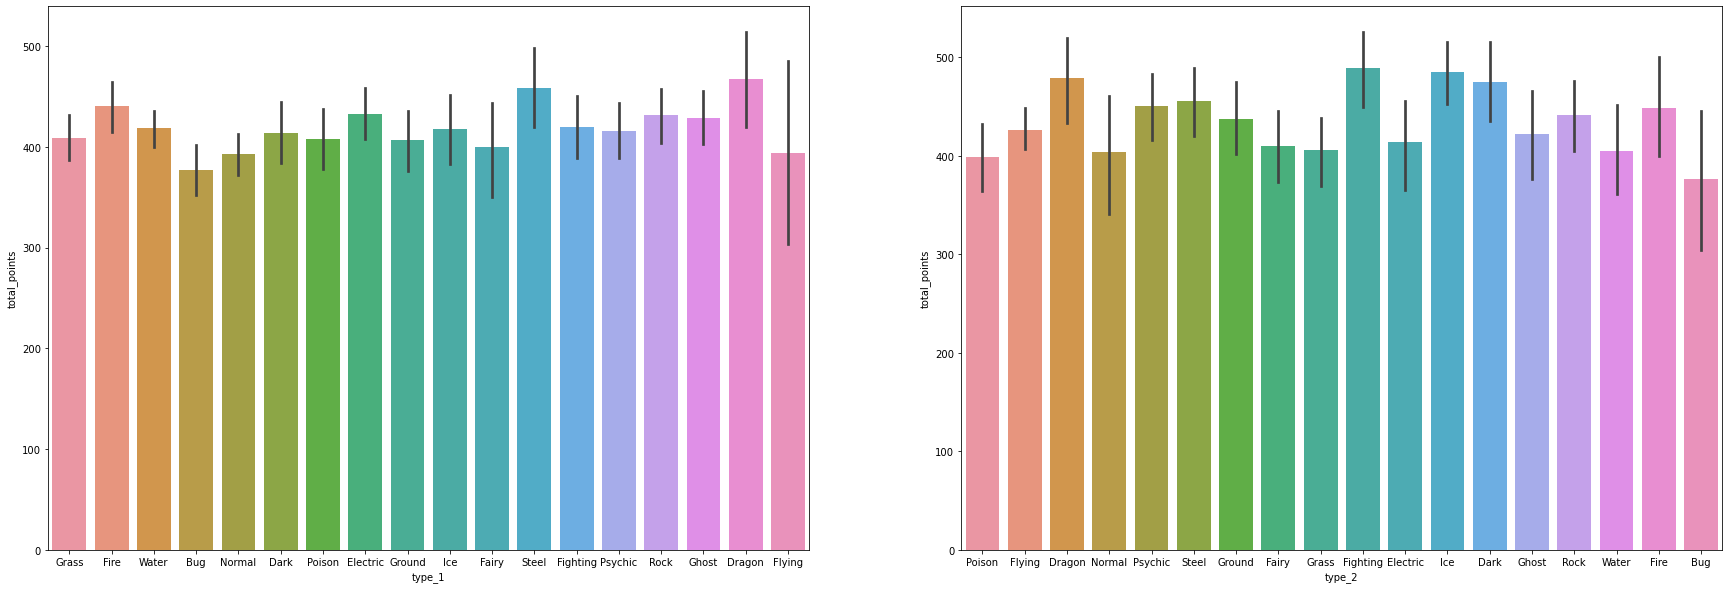

In [492]:
#We can see that the most common type is water, and the most common secondary type is flying.
#This will be important to keep in mind when we are looking at the best pokemon to use in a random battle.
#Let's look at the average stats of each type.
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
sns.barplot(x='type_1', y='total_points', data=df, ax=axes[0])
sns.barplot(x='type_2', y='total_points', data=df, ax=axes[1])

In [493]:
#Though the average stats of almost all the types is similar, we see a clear winner and loser.
#In both tables, dragon stands at or near the top as the best type in terms of raw power, while bug is clearly the worst in that regard.
#Now, let's make a column of the average against score for each pokemon.
df['against_average'] = df[['against_normal', 'against_fire', 'against_water', 'against_electric', 'against_grass', 'against_ice', 'against_fight', 'against_poison', 'against_ground', 'against_flying', 'against_psychic', 'against_bug', 'against_rock', 'against_ghost', 'against_dragon', 'against_dark', 'against_steel', 'against_fairy']].mean(axis=1)
df

/var/folders/lj/_t_zb7zn4kx7chvb30nnr2540000gn/T/ipykernel_42916/339556083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['against_average'] = df[['against_normal', 'against_fire', 'against_water', 'against_electric', 'against_grass', 'against_ice', 'against_fight', 'against_poison', 'against_ground', 'against_flying', 'against_psychic', 'against_bug', 'against_rock', 'against_ghost', 'against_dragon', 'against_dark', 'against_steel', 'against_fairy']].mean(axis=1)


,pokedex_number,name,status,type_1,type_2,ability_1,ability_2,ability_hidden,total_points,hp,...,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,against_average
0,1,Bulbasaur,Normal,Grass,Poison,Overgrow,NaN,Chlorophyll,318,45,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.069444
1,2,Ivysaur,Normal,Grass,Poison,Overgrow,NaN,Chlorophyll,405,60,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.069444
2,3,Venusaur,Normal,Grass,Poison,Overgrow,NaN,Chlorophyll,525,80,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.069444
3,3,Mega Venusaur,Normal,Grass,Poison,Thick Fat,NaN,NaN,625,80,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.958333
4,4,Charmander,Normal,Fire,NaN,Blaze,NaN,Solar Power,309,39,...,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,883,Arctovish,Normal,Water,Ice,Water Absorb,Ice Body,Slush Rush,505,90,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.125000
1024,884,Duraludon,Normal,Steel,Dragon,Light Metal,Heavy Metal,Stalwart,535,70,...,0.5,0.5,0.5,0.5,1.0,1.0,1.0,0.5,1.0,0.791667
1025,885,Dreepy,Normal,Dragon,Ghost,Clear Body,Infiltrator,Cursed Body,270,28,...,1.0,1.0,0.5,1.0,2.0,2.0,2.0,1.0,2.0,1.000000
1026,886,Drakloak,Normal,Dragon,Ghost,Clear Body,Infiltrator,Cursed Body,410,68,...,1.0,1.0,0.5,1.0,2.0,2.0,2.0,1.0,2.0,1.000000


<AxesSubplot:xlabel='type_2', ylabel='against_average'>

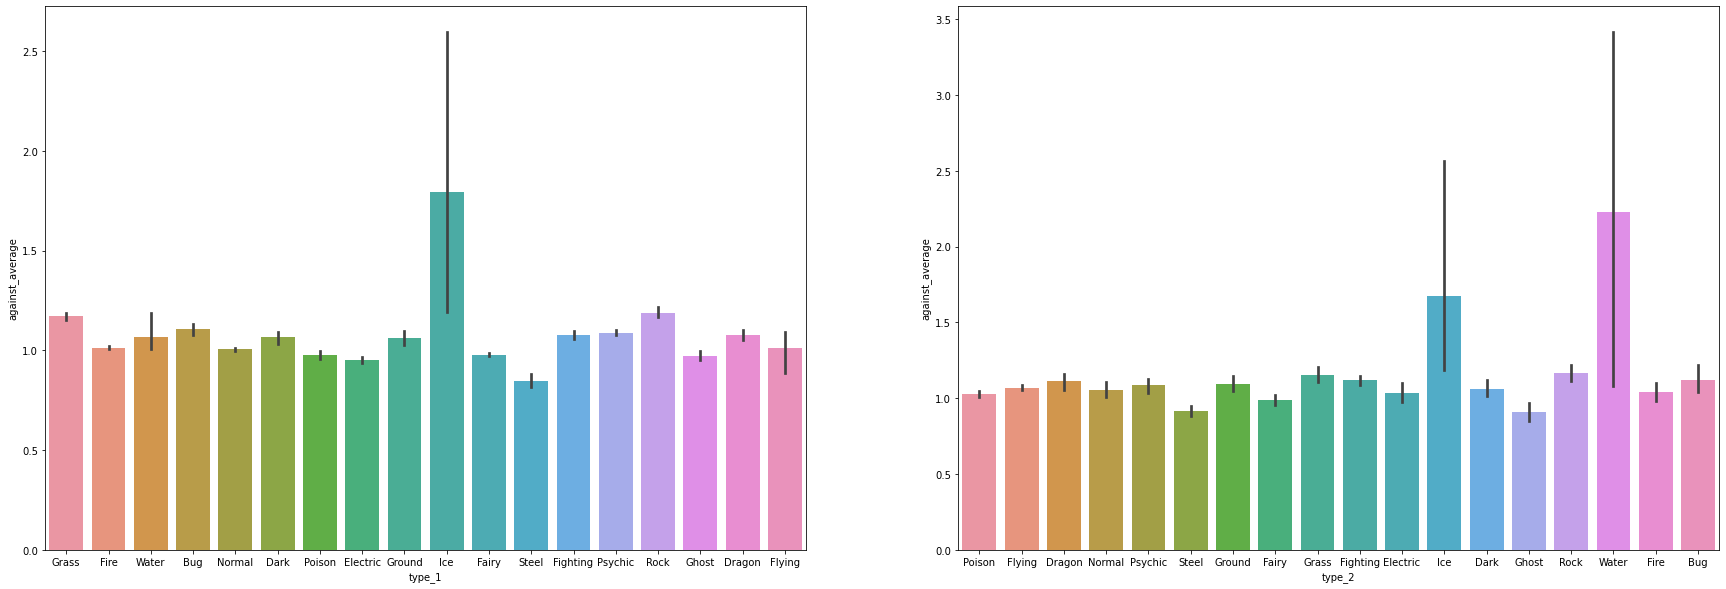

In [494]:
#Let's look at how good each type is against all others via this new variable.
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
sns.barplot(x='type_1', y='against_average', data=df, ax=axes[0])
sns.barplot(x='type_2', y='against_average', data=df, ax=axes[1])

In [495]:
#What this table tells us, is the offensive coverage of the types, or how well they can attack other types.
#We see that while most types are similar, ice and water are very powerful types offensively.
#Now, let's look at the best pokemon to use in a random battle.
#First, let's determine the most common types to face, adding counts for type1 and type2.
(df['type_1'].value_counts() + df['type_2'].value_counts()).sort_values(ascending=False)

Water       143
Normal      119
Grass       111
Flying      101
Bug          87
Psychic      85
Poison       74
Fire         73
Ground       73
Rock         69
Dark         66
Electric     63
Ghost        59
Fighting     58
Steel        55
Fairy        53
Ice          50
Dragon       49
dtype: int64

In [496]:
#The most common types, by far, are water, normal, grass, flying, bug, and psychic.
#Let's look at the best pokemon to use against (offensively) each of these types, defining a new column 'against_common'
#With this new metric, we consider all the types, but heavily weigh common types based on their occurence.
df['against_common'] = df['against_average'] * (df['against_water'] + df['against_normal'] + df['against_grass'] + df['against_flying'] + df['against_bug'] + df['against_psychic'])
df

/var/folders/lj/_t_zb7zn4kx7chvb30nnr2540000gn/T/ipykernel_42916/2699247769.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['against_common'] = df['against_average'] * (df['against_water'] + df['against_normal'] + df['against_grass'] + df['against_flying'] + df['against_bug'] + df['against_psychic'])


,pokedex_number,name,status,type_1,type_2,ability_1,ability_2,ability_hidden,total_points,hp,...,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,against_average,against_common
0,1,Bulbasaur,Normal,Grass,Poison,Overgrow,NaN,Chlorophyll,318,45,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.069444,7.218750
1,2,Ivysaur,Normal,Grass,Poison,Overgrow,NaN,Chlorophyll,405,60,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.069444,7.218750
2,3,Venusaur,Normal,Grass,Poison,Overgrow,NaN,Chlorophyll,525,80,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.069444,7.218750
3,3,Mega Venusaur,Normal,Grass,Poison,Thick Fat,NaN,NaN,625,80,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.958333,6.468750
4,4,Charmander,Normal,Fire,NaN,Blaze,NaN,Solar Power,309,39,...,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,1.000000,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,883,Arctovish,Normal,Water,Ice,Water Absorb,Ice Body,Slush Rush,505,90,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.125000,6.750000
1024,884,Duraludon,Normal,Steel,Dragon,Light Metal,Heavy Metal,Stalwart,535,70,...,0.5,0.5,0.5,1.0,1.0,1.0,0.5,1.0,0.791667,2.177083
1025,885,Dreepy,Normal,Dragon,Ghost,Clear Body,Infiltrator,Cursed Body,270,28,...,1.0,0.5,1.0,2.0,2.0,2.0,1.0,2.0,1.000000,3.500000
1026,886,Drakloak,Normal,Dragon,Ghost,Clear Body,Infiltrator,Cursed Body,410,68,...,1.0,0.5,1.0,2.0,2.0,2.0,1.0,2.0,1.000000,3.500000


In [497]:
#Now, let's look at the best pokemon to use against each of the common types.
#First, lets look at powerful pokemon in the top 25% of the total_points column.
df_top_cov = df[df['total_points'] > df['total_points'].quantile(0.75)]
df_top_cov = df_top_cov[['name', 'type_1', 'type_2', 'against_common']].sort_values(by='against_common', ascending=False).head(20)
df_top_cov

,name,type_1,type_2,against_common
438,Walrein,Ice,Water,52.361111
553,Rhyperior,Ground,Rock,14.819444
640,Leavanny,Bug,Grass,12.152778
764,Chesnaught,Grass,Fighting,11.500000
134,Exeggutor,Grass,Psychic,11.333333
264,Mega Heracross,Bug,Fighting,10.750000
263,Heracross,Bug,Fighting,10.750000
814,Aurorus,Rock,Ice,10.111111
472,Torterra,Grass,Ground,9.777778
549,Mega Abomasnow,Grass,Ice,9.722222


In [498]:
#If we are specifically looking for offenses, then look to the top 25% of 'overall_atk', defined by attack + special attack.
df['overall_atk'] = df['attack'] + df['sp_attack']
df_top_atk = df[df['overall_atk'] > df['overall_atk'].quantile(0.75)]
df_top_atk = df_top_atk[['name', 'type_1', 'type_2', 'against_common']].sort_values(by='against_common', ascending=False).head(20)
df_top_atk

/var/folders/lj/_t_zb7zn4kx7chvb30nnr2540000gn/T/ipykernel_42916/75814261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overall_atk'] = df['attack'] + df['sp_attack']


,name,type_1,type_2,against_common
553,Rhyperior,Ground,Rock,14.819444
345,Breloom,Grass,Fighting,11.500000
764,Chesnaught,Grass,Fighting,11.500000
134,Exeggutor,Grass,Psychic,11.333333
264,Mega Heracross,Bug,Fighting,10.750000
398,Cacturne,Grass,Dark,10.222222
333,Shiftry,Grass,Dark,10.222222
814,Aurorus,Rock,Ice,10.111111
472,Torterra,Grass,Ground,9.777778
548,Abomasnow,Grass,Ice,9.722222


In [499]:
#Now let's consider the pokemon best against these common types, but also consider their defensive capabilities.
#We will define a new column 'defensive_avg' which is the average of the defensive stats.
df['defensive_avg'] = df[['defense', 'sp_defense']].mean(axis=1)
df

/var/folders/lj/_t_zb7zn4kx7chvb30nnr2540000gn/T/ipykernel_42916/2427163033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['defensive_avg'] = df[['defense', 'sp_defense']].mean(axis=1)


,pokedex_number,name,status,type_1,type_2,ability_1,ability_2,ability_hidden,total_points,hp,...,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,against_average,against_common,overall_atk,defensive_avg
0,1,Bulbasaur,Normal,Grass,Poison,Overgrow,NaN,Chlorophyll,318,45,...,1.0,1.0,1.0,1.0,1.0,0.5,1.069444,7.218750,114,57.0
1,2,Ivysaur,Normal,Grass,Poison,Overgrow,NaN,Chlorophyll,405,60,...,1.0,1.0,1.0,1.0,1.0,0.5,1.069444,7.218750,142,71.5
2,3,Venusaur,Normal,Grass,Poison,Overgrow,NaN,Chlorophyll,525,80,...,1.0,1.0,1.0,1.0,1.0,0.5,1.069444,7.218750,182,91.5
3,3,Mega Venusaur,Normal,Grass,Poison,Thick Fat,NaN,NaN,625,80,...,1.0,1.0,1.0,1.0,1.0,0.5,0.958333,6.468750,222,121.5
4,4,Charmander,Normal,Fire,NaN,Blaze,NaN,Solar Power,309,39,...,2.0,1.0,1.0,1.0,0.5,0.5,1.000000,6.000000,112,46.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,883,Arctovish,Normal,Water,Ice,Water Absorb,Ice Body,Slush Rush,505,90,...,2.0,1.0,1.0,1.0,1.0,1.0,1.125000,6.750000,170,95.0
1024,884,Duraludon,Normal,Steel,Dragon,Light Metal,Heavy Metal,Stalwart,535,70,...,0.5,1.0,1.0,1.0,0.5,1.0,0.791667,2.177083,215,82.5
1025,885,Dreepy,Normal,Dragon,Ghost,Clear Body,Infiltrator,Cursed Body,270,28,...,1.0,2.0,2.0,2.0,1.0,2.0,1.000000,3.500000,100,30.0
1026,886,Drakloak,Normal,Dragon,Ghost,Clear Body,Infiltrator,Cursed Body,410,68,...,1.0,2.0,2.0,2.0,1.0,2.0,1.000000,3.500000,140,50.0


In [500]:
#Find a measure of how good are defensively against common types.
common = ['Water', 'Normal', 'Grass', 'Flying', 'Bug', 'Psychic']
common_pkmn = df[df['type_1'].isin(common) | df['type_2'].isin(common)]
common_pkmn

,pokedex_number,name,status,type_1,type_2,ability_1,ability_2,ability_hidden,total_points,hp,...,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,against_average,against_common,overall_atk,defensive_avg
0,1,Bulbasaur,Normal,Grass,Poison,Overgrow,NaN,Chlorophyll,318,45,...,1.0,1.0,1.0,1.0,1.0,0.5,1.069444,7.218750,114,57.0
1,2,Ivysaur,Normal,Grass,Poison,Overgrow,NaN,Chlorophyll,405,60,...,1.0,1.0,1.0,1.0,1.0,0.5,1.069444,7.218750,142,71.5
2,3,Venusaur,Normal,Grass,Poison,Overgrow,NaN,Chlorophyll,525,80,...,1.0,1.0,1.0,1.0,1.0,0.5,1.069444,7.218750,182,91.5
3,3,Mega Venusaur,Normal,Grass,Poison,Thick Fat,NaN,NaN,625,80,...,1.0,1.0,1.0,1.0,1.0,0.5,0.958333,6.468750,222,121.5
6,6,Charizard,Normal,Fire,Flying,Blaze,NaN,Solar Power,534,78,...,4.0,1.0,1.0,1.0,0.5,0.5,1.027778,5.652778,193,81.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,873,Frosmoth,Normal,Ice,Bug,Shield Dust,NaN,Ice Scales,475,70,...,4.0,1.0,1.0,1.0,2.0,1.0,1.361111,8.847222,190,75.0
1014,876,Indeedee Male,Normal,Psychic,Normal,Inner Focus,Synchronize,Psychic Surge,475,60,...,1.0,0.0,1.0,2.0,1.0,1.0,1.027778,6.680556,170,75.0
1015,876,Indeedee Female,Normal,Psychic,Normal,Own Tempo,Synchronize,Psychic Surge,475,70,...,1.0,0.0,1.0,2.0,1.0,1.0,1.027778,6.680556,150,85.0
1022,882,Dracovish,Normal,Water,Dragon,Water Absorb,Strong Jaw,Sand Rush,505,90,...,1.0,1.0,2.0,1.0,0.5,2.0,0.986111,4.930556,160,90.0


In [501]:
#Find the mean of each against stat for the table.
common_against = pd.Series()
for i in common_pkmn.columns[15:33]:
    common_against[i] = common_pkmn[i].mean()
common_against.sort_values(ascending=True, inplace = True)
common_against

/var/folders/lj/_t_zb7zn4kx7chvb30nnr2540000gn/T/ipykernel_42916/44801913.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  common_against = pd.Series()


against_ground      0.744585
against_water       0.832581
against_steel       0.928700
against_normal      0.928700
against_ghost       0.941336
against_psychic     0.964801
against_dragon      0.964801
against_fight       0.993231
against_fairy       1.022563
against_grass       1.023014
against_poison      1.096570
against_dark        1.113718
against_bug         1.132671
against_fire        1.239170
against_electric    1.249549
against_flying      1.331227
against_rock        1.384477
against_ice         2.166516
dtype: float64

In [502]:
#The types that most resist the common types are ground, water, steel, normal, ghost, psychic, and dragon.
#Let's find the pokemon of these types that are also in the top 25% of the defensive_avg column.
best_def = ['Ground', 'Water', 'Steel', 'Normal', 'Ghost', 'Psychic', 'Dragon']
df_top_def = df[df['defensive_avg'] > df['defensive_avg'].quantile(0.75)][df['type_1'].isin(best_def) | df['type_2'].isin(best_def)]
df_top_def = df_top_def[['name', 'type_1', 'type_2', 'defensive_avg']].sort_values(by='defensive_avg', ascending=False).head(20)
df_top_def

/var/folders/lj/_t_zb7zn4kx7chvb30nnr2540000gn/T/ipykernel_42916/148149584.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_top_def = df[df['defensive_avg'] > df['defensive_avg'].quantile(0.75)][df['type_1'].isin(best_def) | df['type_2'].isin(best_def)]


,name,type_1,type_2,defensive_avg
256,Mega Steelix,Steel,Ground,162.5
368,Mega Aggron,Steel,NaN,155.0
494,Bastiodon,Rock,Steel,153.0
796,Aegislash Shield Forme,Steel,Ghost,150.0
566,Probopass,Rock,Steel,147.5
880,Toxapex,Poison,Water,147.0
567,Dusknoir,Ghost,NaN,135.0
878,Wishiwashi School Form,Water,NaN,132.5
255,Steelix,Steel,Ground,132.5
106,Mega Slowbro,Water,Psychic,130.0


In [503]:
#And there are the pokemon who are best defensively against the common types!
#Now, are there any pokemon in both the offensive and defensive tables?
pd.merge(df_top_atk, df_top_def, on='name')

,name,type_1_x,type_2_x,against_common,type_1_y,type_2_y,defensive_avg


In [504]:
#As we can see, there are no pokemon in both tables
#In terms of balancing the game, this is ideal.
#It should never be a good idea to have a pokemon that would cover all the bases.
#Now, let's look at the best pokemon in raw strength, just for fun.
#pokemon that are in the top 25% of the total_points column.
df_top_tot = df[df['total_points'] > df['total_points'].quantile(0.75)]
df_top_tot = df_top_tot[['name', 'type_1', 'type_2', 'total_points']].sort_values(by='total_points', ascending=False).head(20)
df_top_tot

,name,type_1,type_2,total_points
532,Mega Garchomp,Dragon,Ground,700
301,Mega Tyranitar,Rock,Dark,700
451,Mega Metagross,Steel,Psychic,700
447,Mega Salamence,Dragon,Flying,700
348,Slaking,Normal,NaN,670
771,Ash-Greninja,Water,Dark,640
168,Mega Gyarados,Water,Dark,640
316,Mega Swampert,Water,Ground,635
7,Mega Charizard X,Fire,Dragon,634
8,Mega Charizard Y,Fire,Flying,634
